In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pylab import *
mpl.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
#mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号

1、查看用电类别窃漏电分布图

In [3]:
df = pd.read_csv("E:/P-Python/Steal user distribute.csv",encoding="gb18030")

In [4]:
df.head(10)

,Classification,User,Trade,Start,End,Eletricity
0,大工业,1001,大工业,2011/6/27,2011/7/25,8076
1,非工业,1002,非工业,2011/6/3,2011/6/25,6731
2,居民生活,1003,居民生活,2011/11/18,2012/1/6,6554
3,农业生产,1004,普通工业,2011/1/21,2011/3/6,6051
4,普通工业,1005,农业生产,2011/5/3,2011/6/15,7683
5,商业,1006,大工业,2011/5/12,2011/6/15,6020
6,非居民,1007,居民生活,2011/10/14,2011/11/20,8645
7,NaN,1008,普通工业,2011/7/5,2011/8/17,7415
8,NaN,1009,普通工业,2011/11/12,2011/12/17,9225
9,NaN,1010,居民生活,2011/12/21,2012/2/8,8005


In [5]:
df.drop("Classification",axis=1,inplace = True) #删除第一列数据

In [6]:
df_count = df.groupby("Trade").count()#统计行业的频数

In [7]:
df_count = df_count.sort_values("Eletricity")

(1)绘制频率直方图；pandas = D.plot(kind = "box");kind =line,bar,box,pie,是DataFrame或Seris对象内置方法作图。

In [8]:
#help(df_count.plot)

In [9]:
#df_count["User"].plot(kind ="bar",title="窃漏电用户行业分布",figsize=(5, 4)) #用pandas在df_count数据集上画条形图

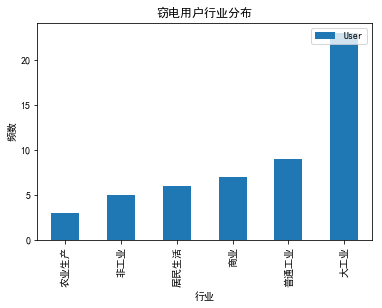

In [10]:
df_count["User"].plot(kind ="bar") #在df_count数据集上画条形图,x轴是数据的Index
plt.xlabel("行业") #绘制X轴标签
plt.ylabel("频数") #绘制题目
plt.title("窃电用户行业分布") #绘制标题
plt.legend(loc = 1) #绘制图例，loc 图例的位置

In [11]:
#df["Eletricity"].plot.hist(bins=6, alpha=0.5, normed=True)  #带密度的直方图，可以不关注其物理意义，主要看用法
#df["Eletricity"].plot.kde(style='r-')  #Y轴是密度

In [12]:
#df_count.plot.bar(stacked=True) #stacked = True 是否堆叠

（2）绘制饼图;Matplotlib库 = plt.plot(x,y,S),绘制y对x,S为制定样式、类型、颜色；

In [13]:
df_count['Percent'] = df_count.iloc[:,0]/sum(df_count.iloc[:,0]) #计算不同行业频数占比

In [14]:
df_count.head(100)

,User,Start,End,Eletricity,Percent
Trade,,,,,
农业生产,3,3,3,3,0.056604
非工业,5,5,5,5,0.094340
居民生活,6,6,6,6,0.113208
商业,7,7,7,7,0.132075
普通工业,9,9,9,9,0.169811
大工业,23,23,23,23,0.433962


In [15]:
plt.figure(figsize = (8,5))

In [16]:
#labels = "agriculture","business","industry","resident","gen_ind","no_ind" #定义标签

In [17]:
labels ="农业","商业","大工业","居民生活","普通工业","非工业" #定义标签

In [18]:
sizes = df_count.iloc[:,4] #每一块的取值等于percent列的值

颜色别名:b蓝色,g绿色,r红色,y黄色,c青色,k黑色,m洋红色,w白色

In [19]:
colors = ["yellowgreen","gold","red","blue","purple","lightcoral"] #设置颜色

In [20]:
#colors = ["b","r","c","m","g","y"] #设置颜色

In [21]:
explode = (0,0,0.1,0,0,0) #设置比例，突触显示工业

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

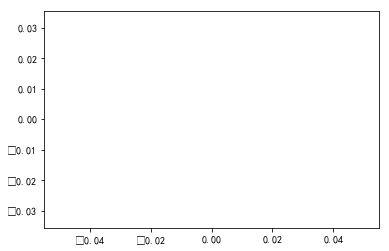

In [22]:
plt.axis("equal") #显示为圆，避免压缩为椭圆

([<matplotlib.patches.Wedge at 0x9da12e8>,
  <matplotlib.text.Text at 0x9ddc160>])

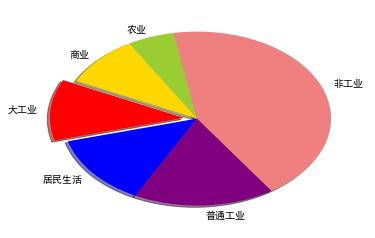

In [23]:
plt.pie(sizes,explode = explode,labels=labels,colors = colors,shadow = True,startangle = 100) #数据、比例、标签、颜色、阴影、初始角度

2、正常用户用电趋势

In [24]:
df_normal = pd.read_csv("E:/P-Python/user.csv")

In [25]:
df_normal.head()

,Date,Eletricity
0,2012/2/1,6200
1,2012/2/2,6440
2,2012/2/3,6440
3,2012/2/4,4293
4,2012/2/5,2146


In [ ]:
df_normal

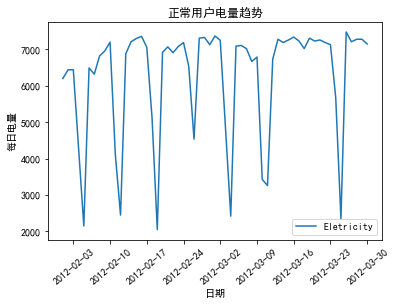

In [45]:
#设置x标签的显示角度
plt.xticks(rotation=40)
plt.plot_date(df_normal["Date"],df_normal["Eletricity"],"-",xdate = True)
plt.xlabel("日期")
plt.ylabel("每日电量")
plt.title("正常用户电量趋势")
plt.legend(loc = 4)

2、窃电用户用电趋势分析

In [27]:
df_steal = pd.read_csv("E:/P-Python/Steal user.csv")

In [28]:
df_steal.head()

,Date,Eletricity
0,2012/2/1,6100
1,2012/2/2,6312
2,2012/2/3,6240
3,2012/2/4,4293
4,2012/2/5,3346


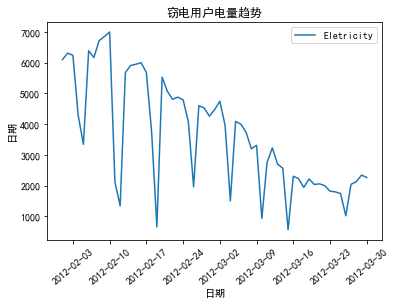

In [44]:
#设置x标签的显示角度
plt.xticks(rotation=40)
plt.plot_date(df_steal["Date"],df_steal["Eletricity"],"-",xdate =True)
plt.xlabel("日期")
plt.ylabel("日期")
plt.title("窃电用户电量趋势")
plt.legend(loc = 1)